# Let's Code Convolutional Neural Network(CNN)

![https://media.giphy.com/media/Ln2dAW9oycjgmTpjX9/giphy.gif](https://media.giphy.com/media/Ln2dAW9oycjgmTpjX9/giphy.gif)

# Importing the required libraries

In [1]:

import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image
print(os.listdir("."))

# Keras Libraries
import pandas as pd
import keras
from keras import backend as K
from keras import models
from keras.callbacks import ModelCheckpoint
from keras.preprocessing import image
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import ZeroPadding2D
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img

['.ipynb_checkpoints', 'CNN-Pneumonia-Detection.ipynb', 'shapes_cnn.h5']


Using TensorFlow backend.


**Setting up the dataset location**
    

In [2]:
mainDIR = 'E:\\Universite\\8yy\\469\\Project\\dataset\\chest_xray\\'
print(os.listdir(mainDIR))

['test', 'train']


**Why we split our data set before doing anything? Answer is in final report.**

In [3]:
train_folder= mainDIR+'train\\'
test_folder = mainDIR+'test\\'

**Setting up the training, testing folders**


In [4]:
train_n = train_folder+'NORMAL\\'
train_p = train_folder+'PNEUMONIA\\'

test_n = test_folder+'NORMAL\\'
test_p = test_folder+'PNEUMONIA\\'

## Let's look at the outline of our dataset.


In [5]:
size_train_n=len(os.listdir(train_n))
size_train_p=len(os.listdir(train_p))
total_train = size_train_n+size_train_p

size_test_n=len(os.listdir(test_n))
size_test_p=len(os.listdir(test_p))
total_test=size_test_n+size_test_p

total_n = size_test_n+size_train_n
total_p = size_test_p+size_train_p

data = [[size_train_n,size_train_p,total_train],
        [size_test_n,size_test_p,total_test],
        [total_n,total_p,total_n+total_p]]
indexes = ["Train","Test","Total"]
pd.DataFrame(data,columns=["Normal Count","Pneumonia Count","Total"],index=indexes)

,Normal Count,Pneumonia Count,Total
Train,1349,3883,5232
Test,234,390,624
Total,1583,4273,5856


As you can see, we have total 5856 images those are high resolution. The train set is containing 90% of the dataset and the test set is 10% of the dataset.

## Let's look at some of the pictures

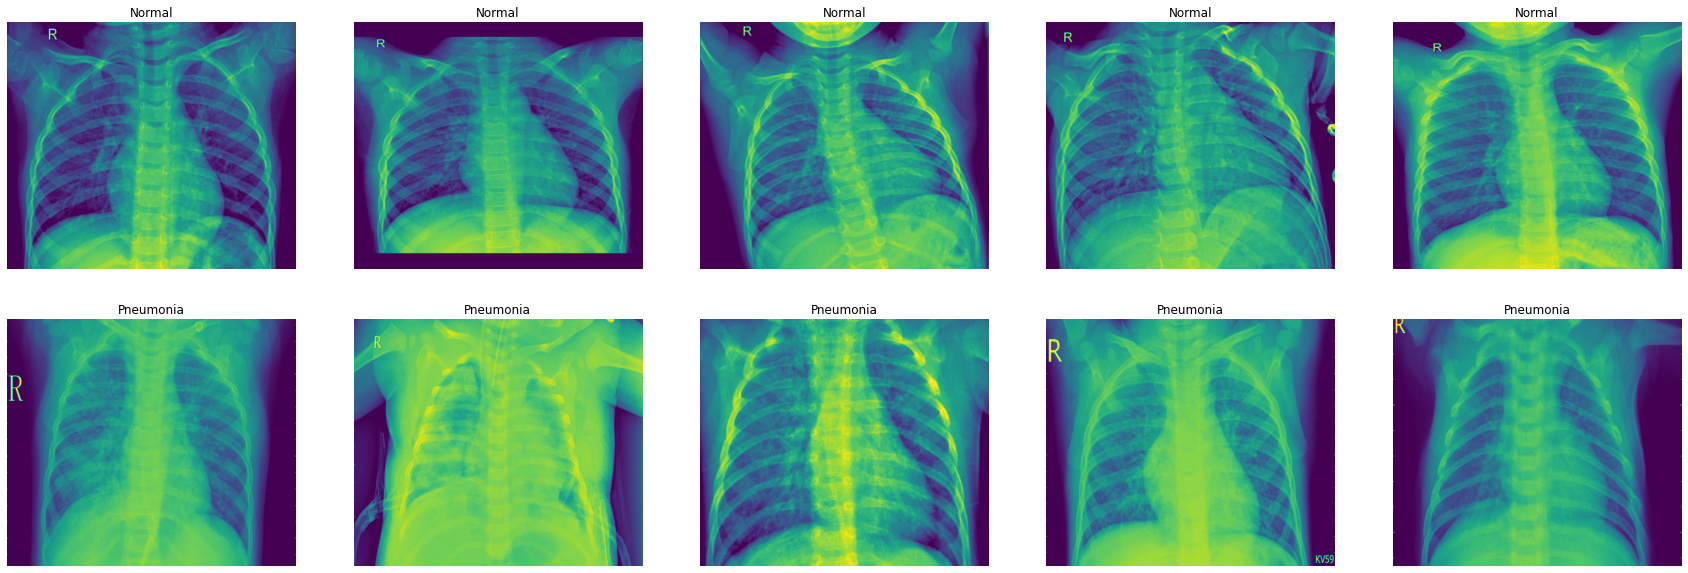

In [6]:
norm_pics = os.listdir(train_n)
sic_pics = os.listdir(train_p)

f,ax = plt.subplots(2,5,figsize=(30,10))
for i in range(5):
    tmp=np.random.randint(0,len(os.listdir(train_n)))
    img = Image.open(train_n+norm_pics[tmp])
    ax[0, i].imshow(img, cmap='viridis')
    ax[0, i].set_title("Normal")
    ax[0, i].axis('off')
    ax[0, i].set_aspect('auto')

for i in range(5):
    tmp=np.random.randint(0,len(os.listdir(train_p)))
    img = Image.open(train_p+sic_pics[tmp])
    ax[1, i].imshow(img, cmap='viridis')
    ax[1, i].set_title("Pneumonia")
    ax[1, i].axis('off')
    ax[1, i].set_aspect('auto')

plt.show()


**The above pictures are being selected randomly from the dataset. There are slight differences in the pictures. We can see difference between healhty and unhealthy lungs. we can see that the probability of getting sick increases as the lungs visibility decreases. Lets try to teach those to computer.**

![https://media.giphy.com/media/1fnwSUTsHRyGXEYMos/giphy.gif](https://media.giphy.com/media/1fnwSUTsHRyGXEYMos/giphy.gif)

# Let's build the CNN model


In [8]:
cnn = Sequential()

#Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3), name="conv_1"))
#Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))

#-------------------------------------------------------------#

# 2nd Convolution
cnn.add(Conv2D(64, (3, 3), activation="relu",name="conv_2"))
# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

#-------------------------------------------------------------#


# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dropout(rate=0.2))
cnn.add(Dense(activation = 'sigmoid', units = 1))
# dense unit is 1 if I want to the binary output.
# dense unit is 2 if I want to the categorical output.

# Compile the Neural network
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Let's look at our CNN model**

In [9]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

# Fitting the CNN to the images

Preparing images for training our CNN model.

In [11]:
# The function ImageDataGenerator augments your image by iterating through image as your CNN is getting ready to process that image

train_datagen = ImageDataGenerator( rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)  #Image normalization

training_set = train_datagen.flow_from_directory(train_folder,
                                                 shuffle=True,
                                                 target_size = (64, 64),
                                                 batch_size = 64,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory(test_folder,
                                            target_size = (64, 64),
                                            batch_size = 64,
                                            class_mode = 'binary')


Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


**Trainin Model**

In [12]:
checkpointer = ModelCheckpoint(filepath="E:\\Universite\\8yy\\469\\Project\\Pneumonia-Detection-From-Chest-X-Ray-Images\\okan\\CNNbest_weights.hdf5", 
                               monitor = 'val_acc',
                               verbose=1, 
                               save_best_only=True)

In [13]:
cnn_model = cnn.fit_generator(training_set,
                               steps_per_epoch = len(os.listdir(train_n)+os.listdir(train_p))//training_set.batch_size,
                               epochs = 10,
                               callbacks=[checkpointer],
                               validation_data = test_set,
                               validation_steps = 50)
# greater than 20 epoch is caused to overfitting be carefull

Epoch 1/10
81/81 [==============================] - 85s 1s/step - loss: 0.2842 - accuracy: 0.8769 - val_loss: 0.7789 - val_accuracy: 0.7500
Epoch 2/10
 1/81 [..............................] - ETA: 13s - loss: 0.1257 - accuracy: 0.9531

D:\python38\lib\site-packages\keras\callbacks\callbacks.py:706: RuntimeWarning: Can save best model only with val_acc available, skipping.
  warnings.warn('Can save best model only with %s available, '


81/81 [==============================] - 82s 1s/step - loss: 0.1233 - accuracy: 0.9489 - val_loss: 0.5153 - val_accuracy: 0.7708
Epoch 3/10
81/81 [==============================] - 83s 1s/step - loss: 0.0983 - accuracy: 0.9656 - val_loss: 0.5990 - val_accuracy: 0.7548
Epoch 4/10
81/81 [==============================] - 81s 1s/step - loss: 0.0882 - accuracy: 0.9638 - val_loss: 1.2092 - val_accuracy: 0.7628
Epoch 5/10
81/81 [==============================] - 83s 1s/step - loss: 0.0736 - accuracy: 0.9723 - val_loss: 1.0812 - val_accuracy: 0.7933
Epoch 6/10
81/81 [==============================] - 81s 996ms/step - loss: 0.0676 - accuracy: 0.9743 - val_loss: 1.0920 - val_accuracy: 0.7885
Epoch 7/10
81/81 [==============================] - 82s 1s/step - loss: 0.0609 - accuracy: 0.9758 - val_loss: 0.6181 - val_accuracy: 0.7628
Epoch 8/10
81/81 [==============================] - 81s 1s/step - loss: 0.0524 - accuracy: 0.9812 - val_loss: 1.3331 - val_accuracy: 0.8013
Epoch 9/10
81/81 [==========

In [14]:
cnn.save('shapes_cnn.h5')

#### The result's of our model that we designed

In [15]:
# cnn_model.history

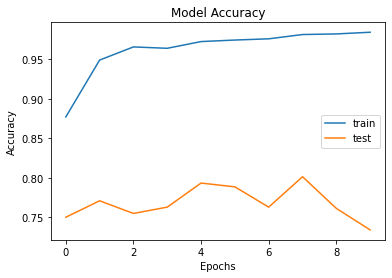

In [16]:
plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

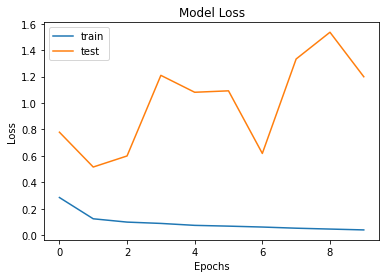

In [17]:
plt.plot(cnn_model.history['loss'])
plt.plot(cnn_model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

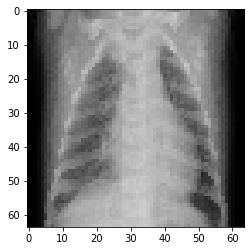

(1, 64, 64, 3)


In [18]:
import random
img_path = test_p+os.listdir(test_p)[random.randint(0,len(os.listdir(test_p)))]
img = image.load_img(img_path, target_size=(64, 64))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

In [19]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = cnn.predict_classes(images, batch_size=10)
print("Real class is Peumonia")
print("Predicted class is","Normal" if classes[0] else "Pneumonia")

Real class is Peumonia
Predicted class is Normal


In [20]:
layer_outputs = [layer.output for layer in cnn.layers[:12]] 
# Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=cnn.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [21]:
activations = activation_model.predict(img_tensor) 
# Returns a list of five Numpy arrays: one array per layer activation

In [22]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 62, 62, 32)


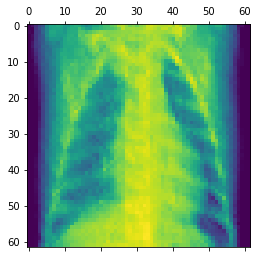

In [23]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

<ipython-input-24-34e2718c48da>:18: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


MemoryError: Unable to allocate 14.4 TiB for an array with shape (9834496, 200704) and data type float64

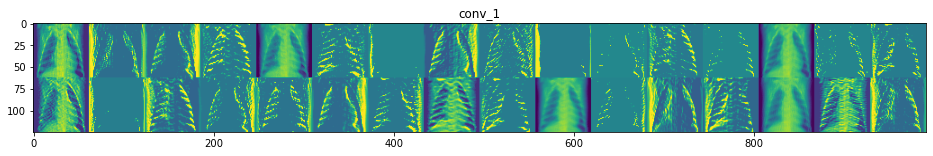

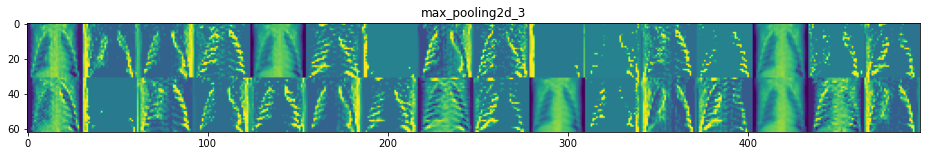

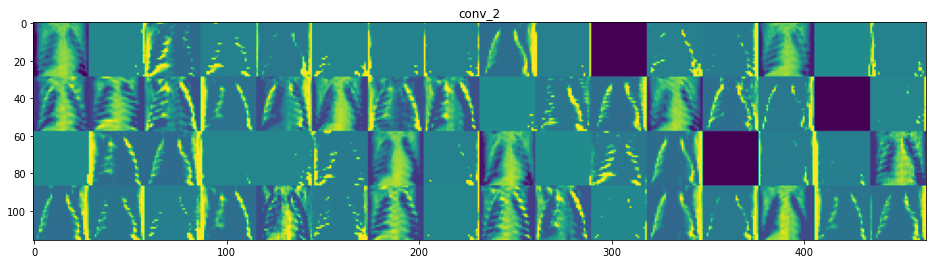

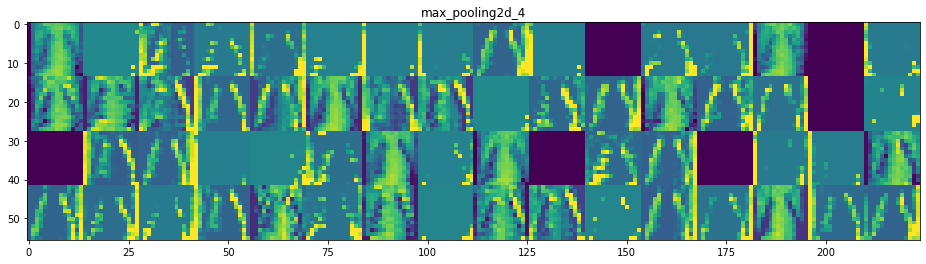

In [24]:
layer_names = []
for layer in cnn.layers[:]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')